# Stochastic gradient descent

## Understanding the algorithm

L'algorithme de la descente de gradient stochastique (Stochastic Gradient Descent, SGD) est une méthode d'optimisation très utilisée, en particulier dans l'apprentissage automatique et le deep learning, pour minimiser une fonction de coût, qui est souvent associée à l'erreur de prédiction d'un modèle.

Voici les points clés pour comprendre cet algorithme :

1. **Principe de base** : La descente de gradient est une technique d'optimisation qui vise à trouver le minimum d'une fonction. Elle fonctionne en mettant à jour les paramètres dans la direction opposée du gradient de la fonction de coût.

2. **Stochastique** : Dans la descente de gradient classique, le gradient est calculé à partir de l'ensemble des données. En revanche, la descente de gradient stochastique met à jour les paramètres en utilisant le gradient estimé à partir d'un seul échantillon ou d'un petit groupe d'échantillons (mini-lot). Cela rend l'algorithme beaucoup plus rapide et capable de gérer de grandes quantités de données.

3. **Convergence** : Alors que la descente de gradient classique converge de manière lisse, la SGD a une nature plus erratique à cause de sa mise à jour fréquente et basée sur moins de données. Cela peut permettre à la SGD de sortir des minimums locaux, mais peut aussi rendre sa convergence vers le minimum global plus difficile.

4. **Apprentissage en ligne** : La SGD est particulièrement utile pour l'apprentissage en ligne, où les données arrivent en flux continu, car elle peut mettre à jour le modèle à chaque nouvel échantillon.

5. **Hyperparamètres** : Comme d'autres méthodes d'optimisation, la SGD a des hyperparamètres tels que le taux d'apprentissage, qui doit être soigneusement réglé. De plus, des techniques comme le moment ou le taux d'apprentissage adaptatif peuvent être utilisées pour améliorer les performances de la SGD.

La SGD est donc un outil puissant, mais qui nécessite une attention particulière concernant le réglage des hyperparamètres et l'analyse de la convergence.

## Usage examples

1. **Apprentissage supervisé** : La SGD est largement utilisée dans l'apprentissage supervisé, notamment pour l'entraînement de réseaux de neurones profonds, de modèles de régression, et de machines à vecteurs de support (SVM).

2. **Traitement de grandes données** : Pour les ensembles de données volumineux, la SGD est souvent préférée car elle permet de mettre à jour les poids du modèle de manière plus rapide et efficace en mémoire, en utilisant des sous-ensembles de données (mini-batchs).

3. **Apprentissage en ligne** : Dans les situations où les données sont reçues de manière séquentielle (par exemple, traitement de flux de données en temps réel), la SGD est idéale car elle peut s'adapter continuellement aux nouvelles données.

4. **Optimisation de fonctions non convexes** : La nature erratique de la SGD peut permettre d'échapper aux minimums locaux dans les fonctions non convexes, ce qui est souvent le cas dans les réseaux de neurones profonds.

## Quand l'utiliser ?

1. **Grandes données** : Si votre ensemble de données est trop grand pour être chargé en mémoire, la SGD est une bonne option car elle ne nécessite pas que toutes les données soient présentes en mémoire pour effectuer les mises à jour.

2. **Rapidité d'exécution** : Si la rapidité d'exécution est une priorité et que vous pouvez tolérer un peu d'imprécision dans les mises à jour des paramètres, la SGD est souvent plus rapide que les méthodes de descente de gradient classique.

3. **Problèmes non convexes** : Dans les cas où la fonction de coût est non convexe (comme dans de nombreux problèmes de deep learning), la SGD peut aider à éviter les pièges des minimums locaux.

4. **Ressources limitées** : Si vous travaillez avec des ressources informatiques limitées, la SGD peut être plus gérable car elle nécessite moins de mémoire et de puissance de calcul par itération.

## Strengths

1. **Efficacité sur de grands ensembles de données** : La SGD est très efficace pour traiter des ensembles de données volumineux car elle ne nécessite pas de charger toutes les données en mémoire à la fois.

2. **Rapidité d'exécution** : En mettant à jour les paramètres après chaque échantillon ou mini-batch, la SGD permet des mises à jour plus fréquentes et plus rapides, accélérant ainsi le processus d'entraînement.

3. **Flexibilité** : La SGD peut être utilisée dans une grande variété de problèmes d'optimisation, notamment dans les réseaux de neurones, où les fonctions de coût sont souvent complexes et non convexes.

4. **Éviter les minimums locaux** : La nature erratique des mises à jour de la SGD peut aider à sortir des minimums locaux dans les problèmes non convexes.

5. **Apprentissage en ligne** : La capacité de la SGD à s'adapter continuellement aux nouvelles données la rend idéale pour les scénarios d'apprentissage en ligne.

## Weaknesses

1. **Convergence irrégulière** : La convergence de la SGD peut être plus erratique et moins stable que celle de méthodes d'optimisation plus traditionnelles, en particulier avec des taux d'apprentissage inappropriés.

2. **Sensibilité aux hyperparamètres** : La performance de la SGD dépend fortement du choix des hyperparamètres, en particulier du taux d'apprentissage et de la taille du mini-batch.

3. **Risque de divergence** : Si le taux d'apprentissage est trop élevé, la SGD peut diverger au lieu de converger vers un minimum.

4. **Moins efficace pour des fonctions de coût simples** : Pour des fonctions de coût simples et bien comportées, des méthodes comme la descente de gradient batch peuvent être plus efficaces.

5. **Bruit dans les mises à jour** : Les mises à jour basées sur un seul échantillon ou de petits lots peuvent introduire du bruit, rendant parfois difficile l'atteinte d'une solution optimale précise.

## Python demonstration

In [144]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
import numpy as np

# Créer des données pour la régression
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

# ===== Approche 1: Utiliser SGD avec Scikit-learn =====

# Créer et entraîner le modèle SGD
model1 = SGDRegressor(max_iter=10000, tol=1e-5)
model1.fit(X, y)

# Prédictions avec le modèle Scikit-learn
predictions1 = model1.predict(X)

# ===== Approche 2: Implémenter SGD Manuellement =====

# Initialisation des paramètres
theta = np.random.randn(2,1)

# Paramètres pour SGD
learning_rate = 0.01
n_iterations = 1000

# Ajout de la colonne de biais à X
X_b = np.c_[np.ones((100, 1)), X]

# Implémentation de SGD
for iteration in range(n_iterations):
    gradients = 2/len(X_b) * X_b.T.dot(X_b.dot(theta) - y.reshape(-1, 1))
    theta = theta - learning_rate * gradients

# Prédictions avec le modèle manuel
predictions2 = X_b.dot(theta)


print("predictions 1:")
print(predictions1)
print("")
print("predictions 2:")
print(predictions2)


predictions 1:
[  16.2157175   105.13813281  -30.82606856  -14.26629701  -18.21612574
   44.40411689   77.71574642    5.88828125  -64.48477205  -49.85444261
  -30.04587969  -61.00752698  -82.49337672   96.45230558   -3.32105404
 -201.11644185   96.13282275  -32.66447747  102.45601249   20.51537014
   22.37971163   31.93323324   44.98514348   34.24324677  -12.68360554
  140.87043996   94.51013543   15.97317176   80.20200146  -34.34868968
  -93.319008     11.2385091   -44.4522394   -45.44845608   20.47912465
  -46.79779223  -19.5320712     9.92716624  -63.55152739  144.34707143
 -109.64714104   12.35970992    3.14470262   82.4732321    88.38589641
  -57.77294794    7.07323367  -19.9855694    81.26327792   53.64700803
  -39.21513362   31.95052466   92.15294958  -36.55987557  105.31258788
   40.64951136   47.33044072   39.0328124   -39.15579911  -64.079013
  -67.71367229   24.39860034  -77.65812361  -70.88016359   97.13193112
  -45.48605442   71.16319221  -34.90742756   18.51846307   17.76

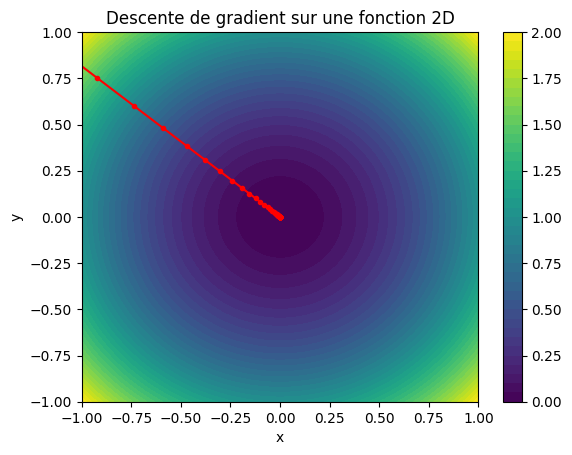

In [316]:
import numpy as np
import matplotlib.pyplot as plt

# Définition d'une fonction 2D à minimiser
def function_2d(x, y):
    return x**2 + y**2

# Gradient de la fonction
def gradient(x, y):
    return 2*x, 2*y

# Paramètres pour SGD
learning_rate = 0.1
n_iterations = 100

# Initialisation des paramètres
x, y = np.random.randn(2)

# Pour stocker l'évolution des paramètres
path = []

# Implémentation de SGD
for iteration in range(n_iterations):
    dx, dy = gradient(x, y)
    x = x - learning_rate * dx
    y = y - learning_rate * dy
    path.append((x, y))

# Convertir la liste en array pour le traçage
path = np.array(path)

# Tracer la fonction et le chemin de la descente de gradient

X, Y = np.meshgrid(np.linspace(-1, 1, 400), np.linspace(-1, 1, 400))  # Limite l'échelle de x et y pour un zoom
Z = function_2d(X, Y)
plt.contourf(X, Y, Z, levels=40, cmap='viridis')
plt.plot(path[:, 0], path[:, 1], 'r.-')
plt.title('Descente de gradient sur une fonction 2D')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

# Ajuster les limites pour zoomer sur la trajectoire
plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()


In [120]:
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo

def generate_batch(center, batch_size):
    """
    Génère un lot de points autour d'un centre donné.
    """
    return center + np.random.randn(batch_size, 2)

# Définition de la fonction de Rosenbrock
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

# Gradient de la fonction de Rosenbrock
def rosenbrock_gradient(x, y, a=1, b=100):
    return np.array([-2*(a - x) - 4*b*x*(y - x**2), 2*b*(y - x**2)])

def bowl_function(x, y):
    return x**2 + y**2

def bowl_gradient(x, y):
    return np.array([2*x, 2*y])

# Paramètres pour les algorithmes
batch_size = 100  # Taille du batch
learning_rate = 0.001
n_iterations = 10000
gamma = 0.90  # Facteur de momentum, typiquement entre 0.9 et 0.99

starting_point = np.random.randn(2) * 2

# Initialisation des paramètres pour GD
x_gd, y_gd = starting_point
path_gd = []
path_gd.append((x_gd, y_gd))

# Initialisation des paramètres pour GDwM
x_gdwm, y_gdwm = starting_point
v_x, v_y = 0, 0  # Initialisation du momentum pour x et y
path_gdwm = []
path_gdwm.append((x_gdwm, y_gdwm))

# Initialisation des paramètres pour SGD
x_sgd, y_sgd = starting_point
path_sgd = []
path_sgd.append((x_sgd, y_sgd))

# Initialisation des paramètres pour Minibatch GD
x_mbgd, y_mbgd = starting_point
path_mbgd = []
path_mbgd.append((x_mbgd, y_mbgd))

for iteration in range(n_iterations):
    # Implémentation de la descente de gradient classique (GD)
    grad_gd = bowl_gradient(x_gd, y_gd)
    x_gd, y_gd = x_gd - learning_rate * grad_gd[0], y_gd - learning_rate * grad_gd[1]
    path_gd.append((x_gd, y_gd))

    # Implémentation de la descente de gradient avec momentum (SGwM)
    grad_gdwm = bowl_gradient(x_gdwm, y_gdwm)
    x_gdwm -= gamma * v_x + learning_rate * grad_gdwm[0]
    y_gdwm -= gamma * v_y + learning_rate * grad_gdwm[1]
    path_gdwm.append((x_gdwm, y_gdwm))

    # Implémentation de la descente de gradient stochastique (SGD)
    x_random, y_random = np.array([x_sgd, y_sgd]) + np.random.randn(2) * 0.1
    grad_sgd = bowl_gradient(x_random, y_random)
    x_sgd -= learning_rate * grad_sgd[0]
    y_sgd -= learning_rate * grad_sgd[1]
    path_sgd.append((x_sgd, y_sgd))

    # Implémentation de la descente de gradient par mini-lot (MBGD)
    batch = generate_batch(np.array([x_mbgd, y_mbgd]), batch_size)
    grad_mbgd = np.mean([bowl_gradient(x, y) for x, y in batch], axis=0)
    x_mbgd, y_mbgd = x_mbgd - learning_rate * grad_mbgd[0], y_mbgd - learning_rate * grad_mbgd[1]
    path_mbgd.append((x_mbgd, y_mbgd))


# Créer des grilles pour la fonction
X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-1, 3, 100))
Z = bowl_function(X, Y)

# Créer un graphique Plotly en 3D
fig = go.Figure()

# Ajouter la surface de la fonction de Rosenbrock
fig.add_trace(go.Surface(z=Z, x=X[0], y=Y[:, 0], colorscale='Viridis', showscale=False, opacity=0.75, hoverinfo='none'))

# Ajouter le chemin de la descente de gradient classique
path_gd = np.array(path_gd)
fig.add_trace(go.Scatter3d(x=path_gd[:, 0], y=path_gd[:, 1], z=bowl_function(path_gd[:, 0], path_gd[:, 1]), mode='lines', name='GD Path', line=dict(color='cyan', width=7)))

# Ajouter le chemin de la descente de gradient avec momentum
path_gdwm = np.array(path_gdwm)
fig.add_trace(go.Scatter3d(x=path_gdwm[:, 0], y=path_gdwm[:, 1], z=bowl_function(path_gdwm[:, 0], path_gdwm[:, 1]), mode='lines', name='SGwM Path', line=dict(color='red', width=7)))

# Ajouter le chemin de la descente de gradient stochastique
path_sgd = np.array(path_sgd)
fig.add_trace(go.Scatter3d(x=path_sgd[:, 0], y=path_sgd[:, 1], z=bowl_function(path_sgd[:, 0], path_sgd[:, 1]), mode='lines', name='SGD Path', line=dict(color='grey', width=7)))

# Ajouter le chemin de la descente de gradient stochastique
path_mbgd = np.array(path_mbgd)
fig.add_trace(go.Scatter3d(x=path_mbgd[:, 0], y=path_mbgd[:, 1], z=bowl_function(path_mbgd[:, 0], path_mbgd[:, 1]), mode='lines', name='MBGD Path', line=dict(color='green', width=7)))


# Ajouter le point de minimum global
fig.add_trace(go.Scatter3d(
    x=[0],
    y=[0],
    z=[0],
    mode='markers',
    marker=dict(
        size=15,
        color='gold',
    ),
    name='Global minimum'
))

# Ajouter le point de départ
fig.add_trace(go.Scatter3d(
    x=[starting_point[0]],
    y=[starting_point[1]],
    z=[bowl_function(starting_point[0],starting_point[1])],
    mode='markers',
    marker=dict(
        size=10,
        color='green',
    ),
    name='Starting point'
))

# Mise en forme du graphique
fig.update_layout(title='3D Visualization of Gradient Descent on the Rosenbrock Function', scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                  autosize=False,
                  width=700,
                  height=700,
                  margin=dict(l=65, r=50, b=65, t=90))

# Afficher le graphique
pyo.plot(fig, filename='3d_rosenbrock.html')

'3d_rosenbrock.html'

End of demonstration

---

## Practical optimization tools

## Sources